In [1]:
# Импортирую необходимы библиотеки

import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Прошу пользователя определить способ ввода значений

input_way = str(input('Способ ввода данных:'
                      '\n1. файл'
                      '\n2. консоль'
                      '\nВыберете число 1 или 2: '))

if input_way == "1":  # Если пользователь выбрал ввести из файла, то ему нужно ввести точное название файла
    name = str(input("Укажите имя файла: "))
    if os.path.isfile(name):
        df = pd.read_table(name, sep='\t')
elif input_way == "2":  # Если ползователь выбрал ввод с консоли, то он вводит следующие значения
    # концентрация субстрата
    substrat = [float(x) for x in input("Введите концентрации через пробел: ").split()]
    # скорость реакции без ингибитора
    velocity = [float(x) for x in input("Введите скорость без ингибитора через пробел: ").split()]
    # скорость реакции  ингибитором
    velocity_inh = [float(x) for x in input("Введите скорость с ингибитором через пробел: ").split()]
    # и затем и этих значений создаю таблицу с данными
    df = pd.DataFrame({
        "S(mM)": substrat,
        "V(mM/min)": velocity,
        "Vi(mM/min)": velocity_inh
    })

Способ ввода данных:
1. файл
2. консоль
Выберете число 1 или 2:  1
Укажите имя файла:  test1.txt


In [4]:
substrat_conc = df.iloc[:, 0]
V_velocity = df.iloc[:, 1]
Vmax_velocity = df.iloc[:, 2]

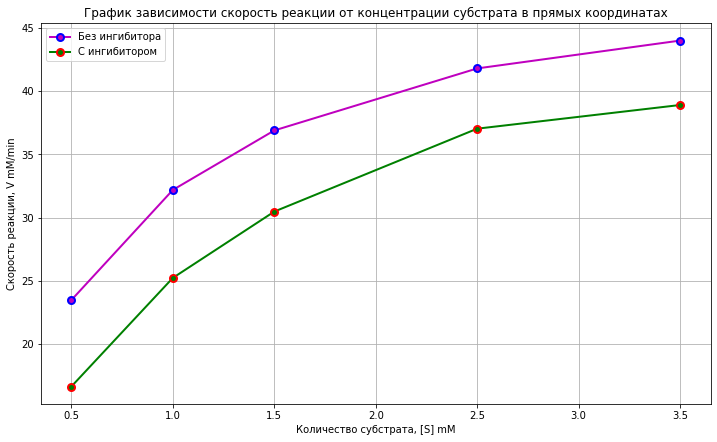

In [5]:
# Строю график зависимости скорости реакции от концентрации субстрата
plt.figure(figsize=(12, 7))
plt.plot(substrat_conc, V_velocity, 'o-m', label="Без ингибитора", lw=2, mec='b', mew=2, ms=7)
plt.plot(substrat_conc, Vmax_velocity, 'o-g', label="С ингибитором", mec='r', lw=2, mew=2, ms=7)
plt.xlabel('Количество субстрата, [S] mM')
plt.ylabel('Скорость реакции, V mM/min')
plt.legend()
plt.title("График зависимости скорость реакции от концентрации субстрата в прямых координатах")
plt.grid(True)
plt.show()

In [6]:
# Получаю обратные значения
df_reverse = 1 / df
substrat_conc_reverse = df_reverse.iloc[:, 0]
V_velocity_reverse = df_reverse.iloc[:, 1]
Vinhibitor_velocity_reverse = df_reverse.iloc[:, 2]

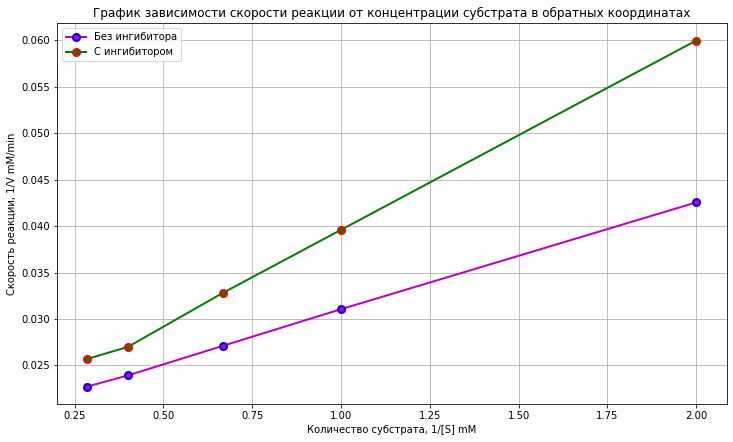

In [7]:
# Строю график зависимости скорости реакции от концентрации субстрата в обратных значениях
plt.figure(figsize=(12, 7))
plt.plot(substrat_conc_reverse, V_velocity_reverse, 'o-m', label="Без ингибитора", lw=2, mec='b', mew=2, ms=7)
plt.plot(substrat_conc_reverse, Vinhibitor_velocity_reverse, 'o-g', label="С ингибитором", mec='r', lw=2, mew=2, ms=7)
plt.xlabel('Количество субстрата, 1/[S] mM')
plt.ylabel('Скорость реакции, 1/V mM/min')
plt.legend()
plt.title("График зависимости скорости реакции от концентрации субстрата в обратных координатах")
plt.grid(True)
plt.show()

In [8]:
# Считаю уравнение реакции
Vmax_slope,  Vmax_intercept, r_max_value, p_max_value, std_max_err = linregress(substrat_conc_reverse,
                                                                               V_velocity_reverse)
Vmax_inh_slope, Vmax_inh_intercept, r_value, p_value, std_err = linregress(substrat_conc_reverse,
                                                                           Vinhibitor_velocity_reverse)

Vmax_slope,  Vmax_intercept = round(Vmax_slope, 4), round(Vmax_intercept, 4)
Vmax_inh_slope, Vmax_inh_intercept = round(Vmax_inh_slope, 4), round(Vmax_inh_intercept, 4)

print(f'Уравнение зависисмости для реакции без ингибитора: y = {Vmax_slope}x + {Vmax_intercept}'
      f'\nУравнение зависимости для реакции с ингибитором: y = {Vmax_inh_slope}x + {Vmax_inh_intercept}')

# Считаю Vmax для реакции
Vmax = round(1 / Vmax_intercept, 4)  # Без ингибитора
Vmax_inh = round(1 / Vmax_inh_intercept, 4)  # С ингибитором

print(f'Vmax для реакции без ингибитора: {Vmax}'
      f'\nVmax для реакции с ингибитором: {Vmax_inh}')

Уравнение зависисмости для реакции без ингибитора: y = 0.0116x + 0.0194
Уравнение зависимости для реакции с ингибитором: y = 0.0203x + 0.0194
Vmax для реакции без ингибитора: 51.5464
Vmax для реакции с ингибитором: 51.5464


In [9]:
# Считаю константу Михаэлиса для реакции
# Без ингибитора
Km = round(Vmax_slope / Vmax_intercept, 4)
# С ингибитором
Km_inh = round(Vmax_inh_slope / Vmax_inh_intercept, 4)
print(f'Константа Михаэлиса для реакции без ингибитора: {Km}',
      f'\nКонстанта Михаэлиса для реакции с ингибитором: {Km_inh}')

Константа Михаэлиса для реакции без ингибитора: 0.5979 
Константа Михаэлиса для реакции с ингибитором: 1.0464


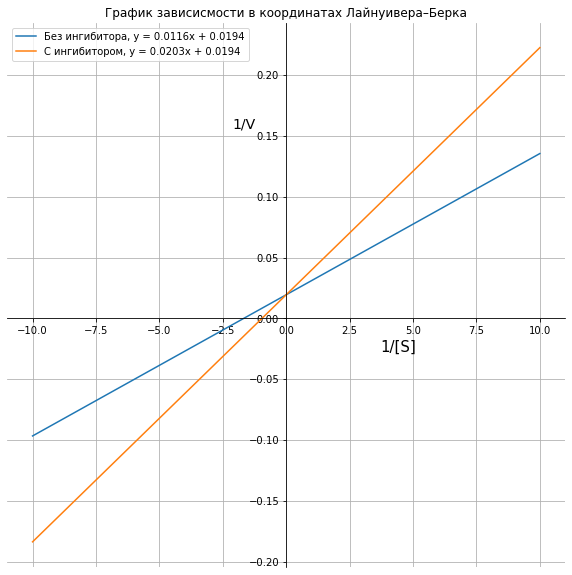

In [10]:
# Строю графики в координатах Лаинуивера-Берка


def f(x, Vmax_slope, Vmax_intercept):
    return Vmax_slope * x + Vmax_intercept


def f2(x, Vmax_inh_slope, Vmax_inh_intercept):
    return Vmax_inh_slope * x + Vmax_inh_intercept


x = np.linspace(-10, 10, 20)

fig, ax = plt.subplots(figsize=(10, 10))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(x, f(x, Vmax_slope, Vmax_intercept), label= f'Без ингибитора, y = {Vmax_slope}x + {Vmax_intercept}')
ax.plot(x, f2(x, Vmax_inh_slope, Vmax_inh_intercept), label= f"С ингибитором, y = {Vmax_inh_slope}x + {Vmax_inh_intercept}")
ax.set_xlabel("1/[S]", size=15, x=0.7)
ax.set_ylabel("1/V", size=14, y=0.8, rotation=0)
ax.set_title("График зависисмости в координатах Лайнуивера–Берка")
plt.legend()

plt.grid(True)
plt.show()

ОПРЕДЕЛЕНИЕ ТИПА ИНГИБИРОВАНИЯ
1) КОНКУРЕНТНЫЙ ИНГИБИТОР увеличивает Кm и не изменяет V max.
2) НЕКОНКУРЕНТНЫЙ ингибитор не изменяет Кm и снижает V max.
3) БЕСКОНКУРЕНТНЫЙ ингибитор в одинаковой степени снижает Кm и V max
4) СМЕШАННЫЙ ИНГИБИТОР снижает Vmax и увеличивает Km

In [11]:
def error(a, b):
    """
    Функция считает разницу в процентах между числами
    
    """
    return((a-b)/a)*100

def type_inhib(Vmax, Km, Vmax_inh, Km_inh, err = 1):
    """
    Функция определяет тип ингибирования
    по следующим параметрам
    :param Vmax: максимальная скорость без ингибитора
    :param Km: константа Михаэлиса без ингибитора
    :param Vmax_inh: максимальная скорость с ингибитором
    :param Km_inh: константа Михаэлиса для ингибитора
    :param error: допустимая разница

    """
    if Vmax_inh > Vmax:
        v = error(Vmax_inh, Vmax)
    else:
        v = error(Vmax, Vmax_inh)
        
    if Km_inh > Km:
        k = error(Km_inh, Km)
    else:
        k = error(Km, Km_inh)
        
    #print(v, k)
    if abs(k) > err >= abs(v) and (Km_inh > Km):
        return 'Это конкурентное ингибирование'
    elif abs(k) <= err < abs(v) and Vmax_inh < Vmax:
        return 'Это неконкурентное ингибирование'
    elif abs(k) > err and abs(v) > error and Km_inh < Km and Vmax_inh < Vmax:
        return 'Это беcконкурентное ингибирование'
    elif abs(k) > err and abs(v) > error and Km_inh > Km and Vmax_inh < Vmax:
        return 'Это смешанное ингибирование'

In [12]:
print(type_inhib(Vmax=Vmax, Km=Km, Vmax_inh=Vmax_inh, Km_inh=Km_inh))

Это конкурентное ингибирование
